# WeatherPy
----

### Analysis
* As expected, the weather becomes significantly warmer as one approaches the equator (0 Deg. Latitude). More interestingly, however, is the fact that the southern hemisphere tends to be warmer this time of year than the northern hemisphere. This may be due to the tilt of the earth.
* There is no strong relationship between latitude and cloudiness. However, it is interesting to see that a strong band of cities sits at 0, 80, and 100% cloudiness.
* There is no strong relationship between latitude and wind speed. However, in northern hemispheres there is a flurry of cities with over 20 mph of wind.

---

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import pprint
import seaborn as sns
# Import API key
from apikey import API_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy


# Output File (CSV)
output_data_file = "output_data_cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [4]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to the cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)
print(cities)



['hualmay', 'mataura', 'lolua', 'hermanus', 'hilo', 'saint-augustin', 'paamiut', 'iqaluit', 'sawang daen din', 'albany', 'punta arenas', 'poum', 'formosa', 'black river', 'cayenne', 'luderitz', 'castro', 'dibrugarh', 'thompson', 'qaanaaq', 'saskylakh', 'kavieng', 'ribeira grande', 'chokurdakh', 'bredasdorp', 'ushuaia', 'barawe', 'barrow', 'saint george', 'mugur-aksy', 'willmar', 'rikitea', 'ostrovnoy', 'umzimvubu', 'ancud', 'nikolskoye', 'jamestown', 'borova', 'voznesenye', 'tasiilaq', 'new norfolk', 'vaini', 'nanortalik', 'georgetown', 'nichinan', 'fare', 'carnarvon', 'nguiu', 'isangel', 'araouane', 'klodzko', 'khatanga', 'bengkulu', 'arraial do cabo', 'taolanaro', 'porteirinha', 'haines junction', 'san andres', 'sorland', 'kamenskoye', 'tuktoyaktuk', 'east london', 'norman wells', 'atuona', 'upernavik', 'port alfred', 'rapid valley', 'torbay', 'avarua', 'tornabe', 'tadine', 'busselton', 'novobataysk', 'cascais', 'macusani', 'pisco', 'dikson', 'coquimbo', 'matara', 'provideniya', 'bet

In [26]:
len(cities)

624

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [6]:
url = "http://api.openweathermap.org/data/2.5/weather?"

row_count = 1
print ("Beginning Data Retrieval")
forecast_data=[]
for i, city in enumerate(cities):
    target_url = url + "appid=" + API_key + "&units=IMPERIAL" + "&q=" + city
    
    try:
        response = requests.get(target_url)
        print(response.url)
        
        city_data = response.json()
        
        # extracting values from json
        Name = city_data ['name']             
        Date = city_data ['dt']      
        Cloudiness = city_data ['clouds']["all"]
        Country = city_data ['sys']["country"]
        Humidity = city_data ["main"]["humidity"]
        Latitude = city_data ['coord']["lat"]
        Longitude = city_data ['coord']["lon"]
        Max_Temp = city_data ['main']["temp_max"]
        Wind_Speed = city_data ["wind"]["speed"]
        forecast_data.append({
            "City" : Name,
            "Date": Date,
            "Cloudiness" : Cloudiness,
            "Country" : Country,
            "Humidity" : Humidity,
            "Latitude" : Latitude,
            "Longitude" : Longitude,
            "Max temp" : Max_Temp,
            "Wind Speed" : Wind_Speed
            })
    except KeyError: 
        print("Cannot find city")


Beginning Data Retrieval
http://api.openweathermap.org/data/2.5/weather?appid=0c3ef20445594fa32eca55290a3a2efd&units=IMPERIAL&q=hualmay
http://api.openweathermap.org/data/2.5/weather?appid=0c3ef20445594fa32eca55290a3a2efd&units=IMPERIAL&q=mataura
http://api.openweathermap.org/data/2.5/weather?appid=0c3ef20445594fa32eca55290a3a2efd&units=IMPERIAL&q=lolua
Cannot find city
http://api.openweathermap.org/data/2.5/weather?appid=0c3ef20445594fa32eca55290a3a2efd&units=IMPERIAL&q=hermanus
http://api.openweathermap.org/data/2.5/weather?appid=0c3ef20445594fa32eca55290a3a2efd&units=IMPERIAL&q=hilo
http://api.openweathermap.org/data/2.5/weather?appid=0c3ef20445594fa32eca55290a3a2efd&units=IMPERIAL&q=saint-augustin
http://api.openweathermap.org/data/2.5/weather?appid=0c3ef20445594fa32eca55290a3a2efd&units=IMPERIAL&q=paamiut
http://api.openweathermap.org/data/2.5/weather?appid=0c3ef20445594fa32eca55290a3a2efd&units=IMPERIAL&q=iqaluit
http://api.openweathermap.org/data/2.5/weather?appid=0c3ef20445594f

http://api.openweathermap.org/data/2.5/weather?appid=0c3ef20445594fa32eca55290a3a2efd&units=IMPERIAL&q=cascais
http://api.openweathermap.org/data/2.5/weather?appid=0c3ef20445594fa32eca55290a3a2efd&units=IMPERIAL&q=macusani
http://api.openweathermap.org/data/2.5/weather?appid=0c3ef20445594fa32eca55290a3a2efd&units=IMPERIAL&q=pisco
http://api.openweathermap.org/data/2.5/weather?appid=0c3ef20445594fa32eca55290a3a2efd&units=IMPERIAL&q=dikson
http://api.openweathermap.org/data/2.5/weather?appid=0c3ef20445594fa32eca55290a3a2efd&units=IMPERIAL&q=coquimbo
http://api.openweathermap.org/data/2.5/weather?appid=0c3ef20445594fa32eca55290a3a2efd&units=IMPERIAL&q=matara
http://api.openweathermap.org/data/2.5/weather?appid=0c3ef20445594fa32eca55290a3a2efd&units=IMPERIAL&q=provideniya
http://api.openweathermap.org/data/2.5/weather?appid=0c3ef20445594fa32eca55290a3a2efd&units=IMPERIAL&q=bethel
http://api.openweathermap.org/data/2.5/weather?appid=0c3ef20445594fa32eca55290a3a2efd&units=IMPERIAL&q=bluff
ht

http://api.openweathermap.org/data/2.5/weather?appid=0c3ef20445594fa32eca55290a3a2efd&units=IMPERIAL&q=lishu
http://api.openweathermap.org/data/2.5/weather?appid=0c3ef20445594fa32eca55290a3a2efd&units=IMPERIAL&q=uruzgan
http://api.openweathermap.org/data/2.5/weather?appid=0c3ef20445594fa32eca55290a3a2efd&units=IMPERIAL&q=mayo
http://api.openweathermap.org/data/2.5/weather?appid=0c3ef20445594fa32eca55290a3a2efd&units=IMPERIAL&q=hithadhoo
http://api.openweathermap.org/data/2.5/weather?appid=0c3ef20445594fa32eca55290a3a2efd&units=IMPERIAL&q=tzaneen
http://api.openweathermap.org/data/2.5/weather?appid=0c3ef20445594fa32eca55290a3a2efd&units=IMPERIAL&q=longyearbyen
http://api.openweathermap.org/data/2.5/weather?appid=0c3ef20445594fa32eca55290a3a2efd&units=IMPERIAL&q=jumla
http://api.openweathermap.org/data/2.5/weather?appid=0c3ef20445594fa32eca55290a3a2efd&units=IMPERIAL&q=umm%20lajj
http://api.openweathermap.org/data/2.5/weather?appid=0c3ef20445594fa32eca55290a3a2efd&units=IMPERIAL&q=vila%2

http://api.openweathermap.org/data/2.5/weather?appid=0c3ef20445594fa32eca55290a3a2efd&units=IMPERIAL&q=ambilobe
http://api.openweathermap.org/data/2.5/weather?appid=0c3ef20445594fa32eca55290a3a2efd&units=IMPERIAL&q=havre-saint-pierre
http://api.openweathermap.org/data/2.5/weather?appid=0c3ef20445594fa32eca55290a3a2efd&units=IMPERIAL&q=ilhabela
http://api.openweathermap.org/data/2.5/weather?appid=0c3ef20445594fa32eca55290a3a2efd&units=IMPERIAL&q=meulaboh
http://api.openweathermap.org/data/2.5/weather?appid=0c3ef20445594fa32eca55290a3a2efd&units=IMPERIAL&q=tazovskiy
http://api.openweathermap.org/data/2.5/weather?appid=0c3ef20445594fa32eca55290a3a2efd&units=IMPERIAL&q=ponta%20do%20sol
http://api.openweathermap.org/data/2.5/weather?appid=0c3ef20445594fa32eca55290a3a2efd&units=IMPERIAL&q=karratha
http://api.openweathermap.org/data/2.5/weather?appid=0c3ef20445594fa32eca55290a3a2efd&units=IMPERIAL&q=kuytun
http://api.openweathermap.org/data/2.5/weather?appid=0c3ef20445594fa32eca55290a3a2efd&u

http://api.openweathermap.org/data/2.5/weather?appid=0c3ef20445594fa32eca55290a3a2efd&units=IMPERIAL&q=neuquen
http://api.openweathermap.org/data/2.5/weather?appid=0c3ef20445594fa32eca55290a3a2efd&units=IMPERIAL&q=puerto%20montt
http://api.openweathermap.org/data/2.5/weather?appid=0c3ef20445594fa32eca55290a3a2efd&units=IMPERIAL&q=conde
http://api.openweathermap.org/data/2.5/weather?appid=0c3ef20445594fa32eca55290a3a2efd&units=IMPERIAL&q=akdepe
http://api.openweathermap.org/data/2.5/weather?appid=0c3ef20445594fa32eca55290a3a2efd&units=IMPERIAL&q=lagoa
http://api.openweathermap.org/data/2.5/weather?appid=0c3ef20445594fa32eca55290a3a2efd&units=IMPERIAL&q=piquete
http://api.openweathermap.org/data/2.5/weather?appid=0c3ef20445594fa32eca55290a3a2efd&units=IMPERIAL&q=sukhothai
http://api.openweathermap.org/data/2.5/weather?appid=0c3ef20445594fa32eca55290a3a2efd&units=IMPERIAL&q=kultuk
http://api.openweathermap.org/data/2.5/weather?appid=0c3ef20445594fa32eca55290a3a2efd&units=IMPERIAL&q=tahe
h

http://api.openweathermap.org/data/2.5/weather?appid=0c3ef20445594fa32eca55290a3a2efd&units=IMPERIAL&q=san%20quintin
http://api.openweathermap.org/data/2.5/weather?appid=0c3ef20445594fa32eca55290a3a2efd&units=IMPERIAL&q=natalio
http://api.openweathermap.org/data/2.5/weather?appid=0c3ef20445594fa32eca55290a3a2efd&units=IMPERIAL&q=chulman
http://api.openweathermap.org/data/2.5/weather?appid=0c3ef20445594fa32eca55290a3a2efd&units=IMPERIAL&q=atambua
http://api.openweathermap.org/data/2.5/weather?appid=0c3ef20445594fa32eca55290a3a2efd&units=IMPERIAL&q=elesbao%20veloso
http://api.openweathermap.org/data/2.5/weather?appid=0c3ef20445594fa32eca55290a3a2efd&units=IMPERIAL&q=caravelas
http://api.openweathermap.org/data/2.5/weather?appid=0c3ef20445594fa32eca55290a3a2efd&units=IMPERIAL&q=gao
http://api.openweathermap.org/data/2.5/weather?appid=0c3ef20445594fa32eca55290a3a2efd&units=IMPERIAL&q=oranjemund
http://api.openweathermap.org/data/2.5/weather?appid=0c3ef20445594fa32eca55290a3a2efd&units=IMPE

http://api.openweathermap.org/data/2.5/weather?appid=0c3ef20445594fa32eca55290a3a2efd&units=IMPERIAL&q=svetlogorsk
http://api.openweathermap.org/data/2.5/weather?appid=0c3ef20445594fa32eca55290a3a2efd&units=IMPERIAL&q=syracuse
http://api.openweathermap.org/data/2.5/weather?appid=0c3ef20445594fa32eca55290a3a2efd&units=IMPERIAL&q=scarborough
http://api.openweathermap.org/data/2.5/weather?appid=0c3ef20445594fa32eca55290a3a2efd&units=IMPERIAL&q=calvinia
http://api.openweathermap.org/data/2.5/weather?appid=0c3ef20445594fa32eca55290a3a2efd&units=IMPERIAL&q=vestmanna
http://api.openweathermap.org/data/2.5/weather?appid=0c3ef20445594fa32eca55290a3a2efd&units=IMPERIAL&q=khandyga
http://api.openweathermap.org/data/2.5/weather?appid=0c3ef20445594fa32eca55290a3a2efd&units=IMPERIAL&q=llanes
http://api.openweathermap.org/data/2.5/weather?appid=0c3ef20445594fa32eca55290a3a2efd&units=IMPERIAL&q=basco
http://api.openweathermap.org/data/2.5/weather?appid=0c3ef20445594fa32eca55290a3a2efd&units=IMPERIAL&q

http://api.openweathermap.org/data/2.5/weather?appid=0c3ef20445594fa32eca55290a3a2efd&units=IMPERIAL&q=nador
http://api.openweathermap.org/data/2.5/weather?appid=0c3ef20445594fa32eca55290a3a2efd&units=IMPERIAL&q=navoloki
http://api.openweathermap.org/data/2.5/weather?appid=0c3ef20445594fa32eca55290a3a2efd&units=IMPERIAL&q=springdale
http://api.openweathermap.org/data/2.5/weather?appid=0c3ef20445594fa32eca55290a3a2efd&units=IMPERIAL&q=bowen
http://api.openweathermap.org/data/2.5/weather?appid=0c3ef20445594fa32eca55290a3a2efd&units=IMPERIAL&q=zenzeli
http://api.openweathermap.org/data/2.5/weather?appid=0c3ef20445594fa32eca55290a3a2efd&units=IMPERIAL&q=visby
http://api.openweathermap.org/data/2.5/weather?appid=0c3ef20445594fa32eca55290a3a2efd&units=IMPERIAL&q=bairnsdale
http://api.openweathermap.org/data/2.5/weather?appid=0c3ef20445594fa32eca55290a3a2efd&units=IMPERIAL&q=kushnarenkovo
Cannot find city
http://api.openweathermap.org/data/2.5/weather?appid=0c3ef20445594fa32eca55290a3a2efd&un

http://api.openweathermap.org/data/2.5/weather?appid=0c3ef20445594fa32eca55290a3a2efd&units=IMPERIAL&q=simplicio%20mendes
http://api.openweathermap.org/data/2.5/weather?appid=0c3ef20445594fa32eca55290a3a2efd&units=IMPERIAL&q=puerto%20leguizamo
http://api.openweathermap.org/data/2.5/weather?appid=0c3ef20445594fa32eca55290a3a2efd&units=IMPERIAL&q=touros
http://api.openweathermap.org/data/2.5/weather?appid=0c3ef20445594fa32eca55290a3a2efd&units=IMPERIAL&q=carnot
http://api.openweathermap.org/data/2.5/weather?appid=0c3ef20445594fa32eca55290a3a2efd&units=IMPERIAL&q=ranong
http://api.openweathermap.org/data/2.5/weather?appid=0c3ef20445594fa32eca55290a3a2efd&units=IMPERIAL&q=jever
http://api.openweathermap.org/data/2.5/weather?appid=0c3ef20445594fa32eca55290a3a2efd&units=IMPERIAL&q=viligili
Cannot find city
http://api.openweathermap.org/data/2.5/weather?appid=0c3ef20445594fa32eca55290a3a2efd&units=IMPERIAL&q=shambu
http://api.openweathermap.org/data/2.5/weather?appid=0c3ef20445594fa32eca55290

In [8]:
Forecast_data_df = pd.DataFrame(forecast_data)
Forecast_data_df

,City,Cloudiness,Country,Date,Humidity,Latitude,Longitude,Max temp,Wind Speed
0,Hualmay,100,PE,1556306992,92,-11.10,-77.61,68.28,17.76
1,Mataura,96,NZ,1556305807,91,-46.19,168.86,53.01,1.99
2,Hermanus,0,ZA,1556306185,88,-34.42,19.24,64.00,1.99
3,Hilo,90,US,1556306664,83,19.71,-155.08,73.99,5.95
4,Saint-Augustin,75,FR,1556306729,71,44.83,-0.61,55.00,11.41
5,Paamiut,34,GL,1556306993,70,61.99,-49.67,29.94,16.46
6,Iqaluit,90,CA,1556306590,86,63.75,-68.52,30.20,10.29
7,Sawang Daen Din,62,TH,1556306993,42,17.48,103.46,90.78,4.88
8,Albany,90,US,1556306710,76,42.65,-73.75,57.00,11.41
9,Punta Arenas,0,CL,1556306615,35,-53.16,-70.91,55.40,23.04


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [34]:
Forecast_data_df.to_csv("cities_raw_data.csv")

### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

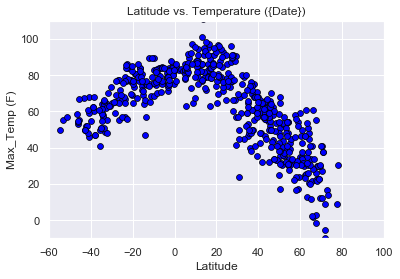

In [10]:
# Set the aesthetic using Seaborn
sns.set()



# Plot the lat vs the max temp
plt.scatter(x = Forecast_data_df['Latitude'], y = Forecast_data_df['Max temp'],
            linewidths = 0.75, edgecolors = 'black', color = 'blue', s=35)

#Set your axises and title

plt.title("Latitude vs. Temperature ({Date})")
plt.xlabel("Latitude")
plt.ylabel("Max_Temp (F)")

# Modify ticks
plt.xlim(-60,100)
plt.ylim(-10, 110)

plt.savefig("./LatVsTemp.png")
plt.show()


#### Latitude vs. Humidity Plot

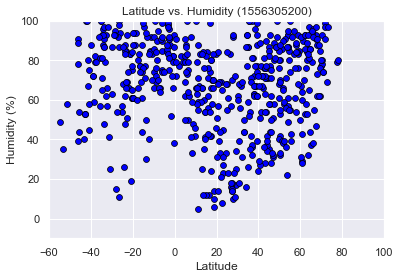

In [11]:
# Set the aesthetic using Seaborn
sns.set()


# Plot the lat vs the max temp
plt.scatter(x = Forecast_data_df['Latitude'], y = Forecast_data_df['Humidity'],
            linewidths = 0.75, edgecolors = 'black', color = 'blue', s=35)

#Set your axises
plt.title(f"Latitude vs. Humidity ({Date})")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")

# Modify ticks
plt.xlim(-60,100)
plt.ylim(-10, 100)

plt.savefig("./LatVsHum.png")
plt.show()
#Change date in dataframe to normal date if you have time

#### Latitude vs. Cloudiness Plot

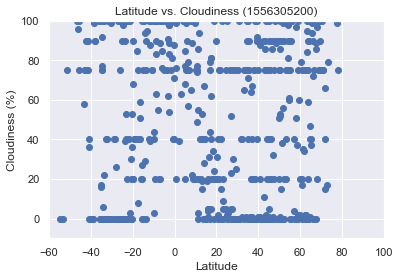

In [12]:
# Set the aesthetic using Seaborn
sns.set()


# Plot the lat vs the max temp
plt.scatter(x = Forecast_data_df['Latitude'], y = Forecast_data_df['Cloudiness'])
plt.title(f"Latitude vs. Cloudiness ({Date})")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")

# Modify ticks
plt.xlim(-60,100)
plt.ylim(-10, 100)

plt.savefig("./LatVsClo.png")
plt.show()
  

#### Latitude vs. Wind Speed Plot

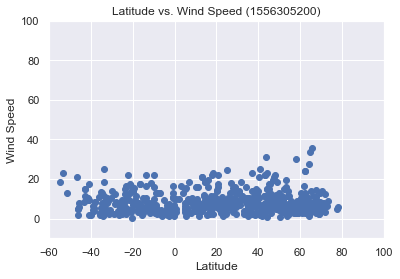

In [13]:
# Set the aesthetic using Seaborn
sns.set()


# Plot the lat vs the max temp
plt.scatter(x = Forecast_data_df['Latitude'], y = Forecast_data_df['Wind Speed'])
plt.title(f"Latitude vs. Wind Speed ({Date})")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")

# Modify ticks
plt.xlim(-60,100)
plt.ylim(-10, 100)

plt.savefig("./LatVsWind.png")
plt.show()